# Import library

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, LSTM
from matplotlib.animation import FuncAnimation
from math import sqrt
from sklearn.metrics import mean_squared_error

In [175]:
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline

# 1. Read data

In [176]:
VNIndex = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/VNI.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
DIG = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/DIG.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
APH = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/APH.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
FRT = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/FRT.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
NHH = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/NHH.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])    
TCM = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/TCM.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])     
VRC = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/VRC.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])   
HBC = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/HBC.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])    
OCB = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/OCB.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])     
TCO = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/TCO.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])   
                       

In [177]:
VNItest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/VNI.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
APHtest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/APH.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
DIGtest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/DIG.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
FRTtest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/FRT.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
HBCtest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/HBC.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
NHHtest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/NHH.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
OCBtest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/OCB.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
TCOtest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/TCO.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
TCMtest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/TCM.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
VRCtest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/VRC.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])

In [178]:

VNIndex["Price"] = pd.to_numeric(VNIndex["Price"].apply(lambda x: x.replace(",", "")))
APH["Price"] = pd.to_numeric(APH["Price"].apply(lambda x: x.replace(",", "")))
DIG["Price"] = pd.to_numeric(DIG["Price"].apply(lambda x: x.replace(",", "")))
FRT["Price"] = pd.to_numeric(FRT["Price"].apply(lambda x: x.replace(",", "")))
NHH["Price"] = pd.to_numeric(NHH["Price"].apply(lambda x: x.replace(",", "")))
HBC["Price"] = pd.to_numeric(HBC["Price"].apply(lambda x: x.replace(",", "")))
OCB["Price"] = pd.to_numeric(OCB["Price"].apply(lambda x: x.replace(",", "")))
TCM["Price"] = pd.to_numeric(TCM["Price"].apply(lambda x: x.replace(",", "")))
TCO["Price"] = pd.to_numeric(TCO["Price"].apply(lambda x: x.replace(",", "")))
VRC["Price"] = pd.to_numeric(VRC["Price"].apply(lambda x: x.replace(",", "")))


In [179]:
VNItest["Price"] = VNItest["Price"].str.replace(',', '').astype(float)
APHtest["Price"] = pd.to_numeric(APHtest["Price"].apply(lambda x: x.replace(",", "")))
DIGtest["Price"] = pd.to_numeric(DIGtest["Price"].apply(lambda x: x.replace(",", "")))
FRTtest["Price"] = pd.to_numeric(FRTtest["Price"].apply(lambda x: x.replace(",", "")))
NHHtest["Price"] = pd.to_numeric(NHHtest["Price"].apply(lambda x: x.replace(",", "")))
HBCtest["Price"] = pd.to_numeric(HBCtest["Price"].apply(lambda x: x.replace(",", "")))
OCBtest["Price"] = pd.to_numeric(OCBtest["Price"].apply(lambda x: x.replace(",", "")))
TCMtest["Price"] = pd.to_numeric(TCMtest["Price"].apply(lambda x: x.replace(",", "")))
TCOtest["Price"] = pd.to_numeric(TCOtest["Price"].apply(lambda x: x.replace(",", "")))
VRCtest["Price"] = pd.to_numeric(VRCtest["Price"].apply(lambda x: x.replace(",", "")))

In [180]:

VNIndex = VNIndex.iloc[::-1]
VNItest = VNItest.iloc[::-1]
APH = APH.iloc[::-1]
APHtest = APHtest.iloc[::-1]
DIG = DIG.iloc[::-1]
DIGtest = DIGtest.iloc[::-1]
FRT = FRT.iloc[::-1]
FRTtest = FRTtest.iloc[::-1]
NHH = NHH.iloc[::-1]
NHHtest = NHHtest.iloc[::-1]
HBC = HBC.iloc[::-1]
HBCtest = HBCtest.iloc[::-1]
OCBtest = OCBtest.iloc[::-1]
OCB = OCB.iloc[::-1]
TCM = TCM.iloc[::-1]
TCMtest = TCMtest.iloc[::-1]
TCO = TCO.iloc[::-1]
TCOtest = TCOtest.iloc[::-1]
VRC = VRC.iloc[::-1]
VRCtest = VRCtest.iloc[::-1]

# 2. Visualize

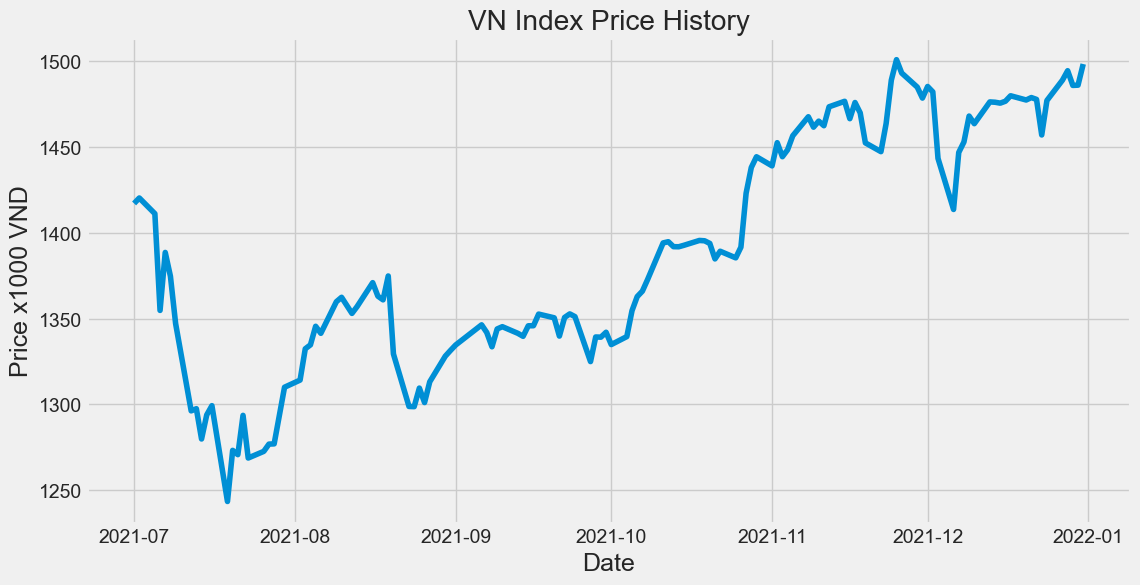

In [181]:
plt.figure(figsize=(12,6))
plt.title('VN Index Price History')
plt.plot(VNIndex['Price'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price x1000 VND', fontsize=18)
plt.show()

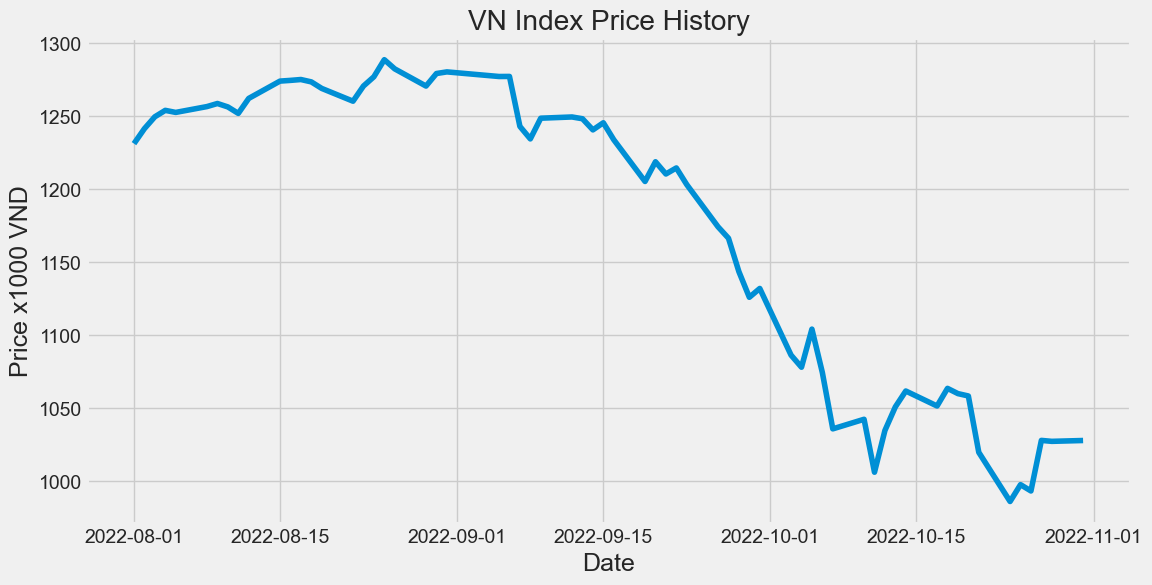

In [182]:
plt.figure(figsize=(12,6))
plt.title('VN Index Price History')
plt.plot(VNItest['Price'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price x1000 VND', fontsize=18)
plt.show()

# 3. Preprocess data and Build Model

### VNINDEX

In [183]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(VNIndex)

time_step = 5

train_data = scaled_data[0:int(len(VNIndex)), :]
x_train = []
y_train = []

for i in range(time_step, len(train_data)):
    x_train.append(train_data[i-time_step:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(125, 5, 1)

In [184]:
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

X = VNIndex.values
train = X[:len(VNIndex)]
test = VNItest.values

start = datetime.now()
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
end = datetime.now()

print("Run time for ARIMA model: ", end - start)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE - ARIMA: %.3f' % rmse)

VNI_valid = VNItest
VNI_valid['Predictions'] = predictions

Run time for ARIMA model:  0:00:07.427591
Test RMSE - ARIMA: 38.035


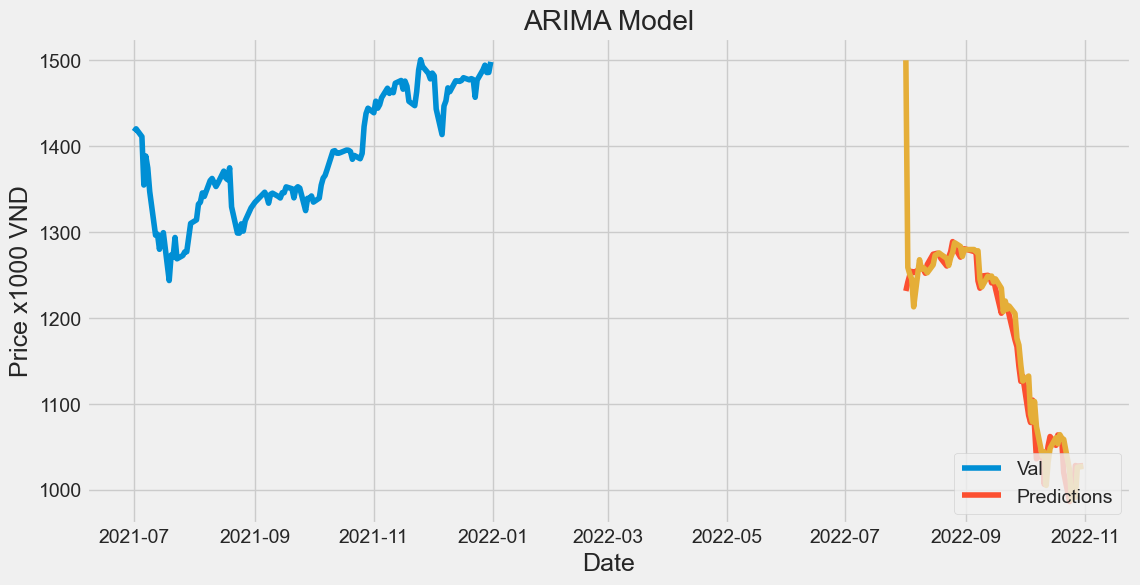

In [185]:
plt.figure(figsize=(12,6))
plt.title('ARIMA Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price x1000 VND', fontsize=18)
plt.plot(VNIndex['Price'])
plt.plot(VNI_valid[['Price', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

### APH

In [186]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(APH)

time_step = 5

train_data = scaled_data[0:int(len(APH)), :]
x_train = []
y_train = []

for i in range(time_step, len(train_data)):
    x_train.append(train_data[i-time_step:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

X = APH.values
train = X[:len(APH)]
test = APHtest.values

start = datetime.now()
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
end = datetime.now()

print("Run time for ARIMA model: ", end - start)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE - ARIMA: %.3f' % rmse)

APH_valid = APHtest
APH_valid['Predictions'] = predictions

Run time for ARIMA model:  0:00:04.550164
Test RMSE - ARIMA: 2066.145


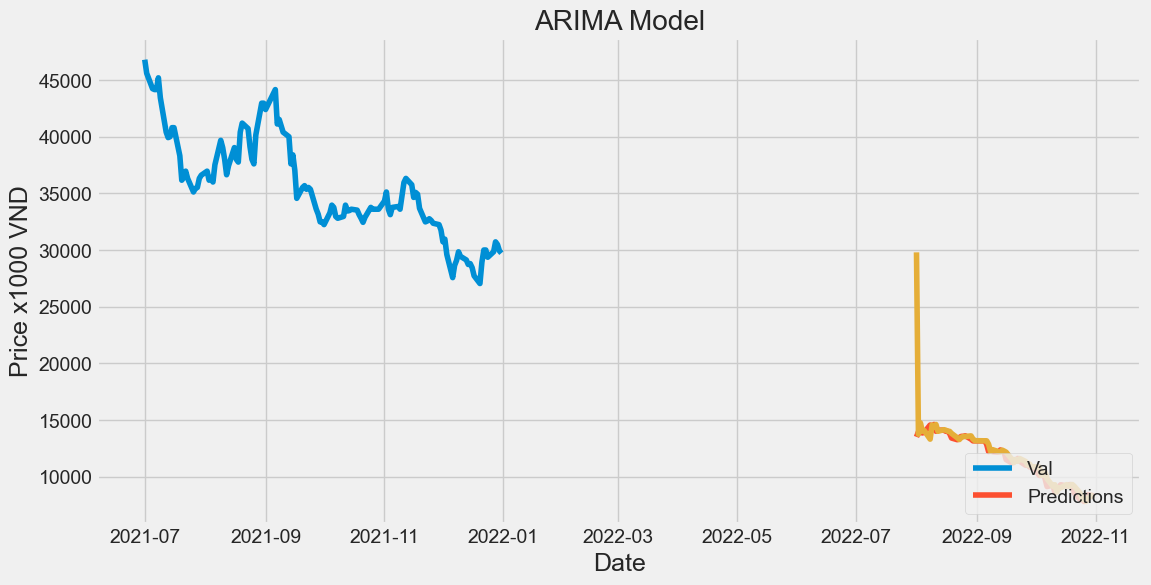

In [187]:
plt.figure(figsize=(12,6))
plt.title('ARIMA Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price x1000 VND', fontsize=18)
plt.plot(APH['Price'])
plt.plot(APH_valid[['Price', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

### DIG

Run time for ARIMA model:  0:00:04.860820
Test RMSE - ARIMA: 5347.470


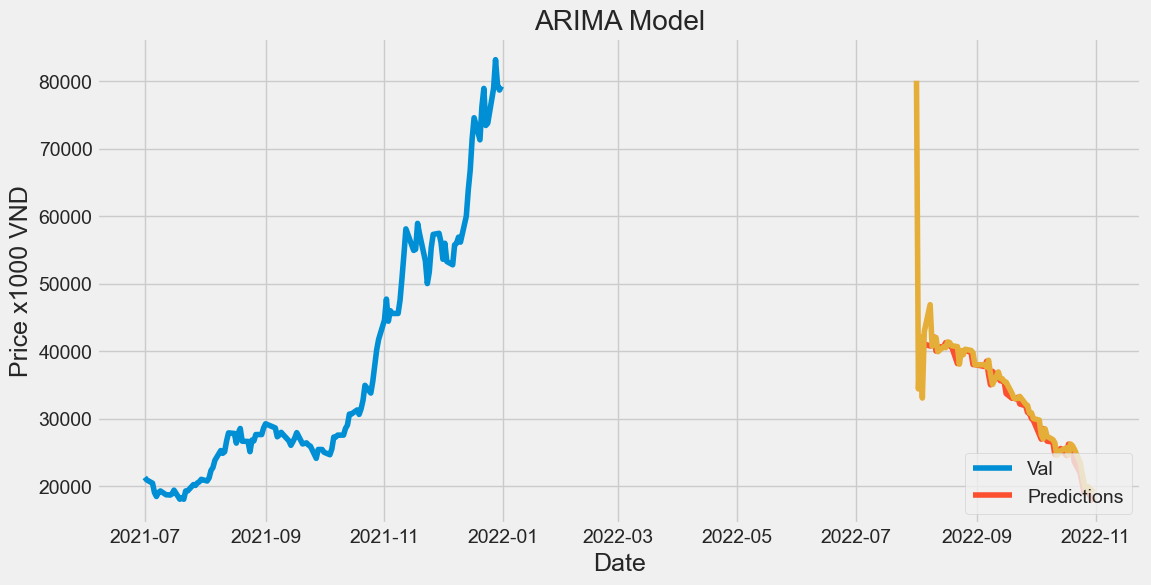

In [188]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(DIG)

time_step = 5

train_data = scaled_data[0:int(len(DIG)), :]
x_train = []
y_train = []

for i in range(time_step, len(train_data)):
    x_train.append(train_data[i-time_step:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

X = DIG.values
train = X[:len(DIG)]
test = DIGtest.values

start = datetime.now()
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
end = datetime.now()

print("Run time for ARIMA model: ", end - start)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE - ARIMA: %.3f' % rmse)

DIG_valid = DIGtest
DIG_valid['Predictions'] = predictions

plt.figure(figsize=(12,6))
plt.title('ARIMA Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price x1000 VND', fontsize=18)
plt.plot(DIG['Price'])
plt.plot(DIG_valid[['Price', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

### FRT

Run time for ARIMA model:  0:00:04.541749
Test RMSE - ARIMA: 3020.580


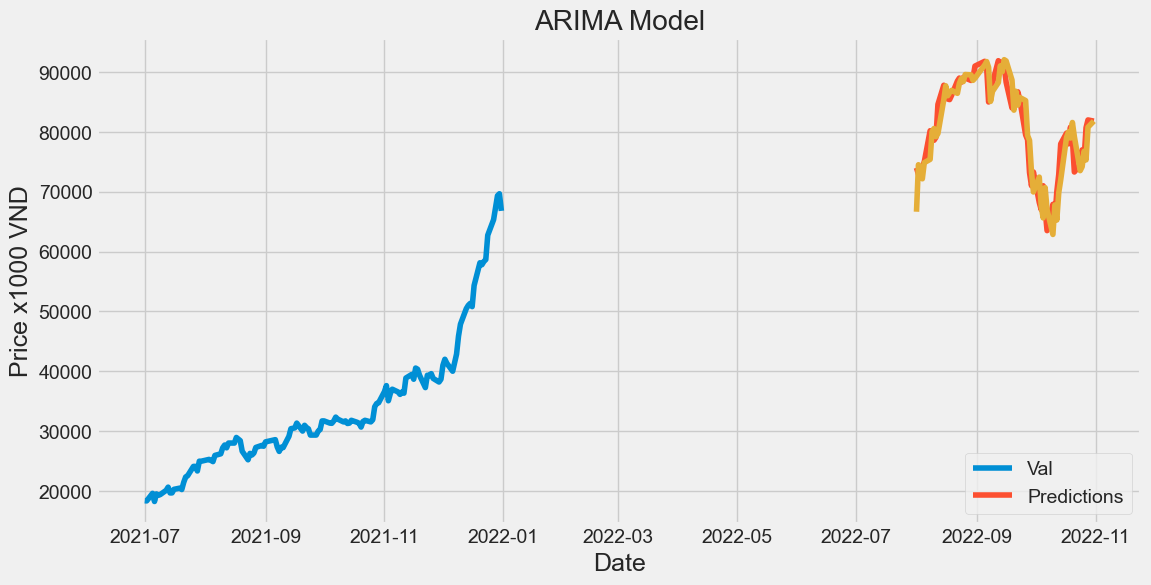

In [189]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(FRT)

time_step = 5

train_data = scaled_data[0:int(len(FRT)), :]
x_train = []
y_train = []

for i in range(time_step, len(train_data)):
    x_train.append(train_data[i-time_step:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

X = FRT.values
train = X[:len(FRT)]
test = FRTtest.values

start = datetime.now()
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
end = datetime.now()

print("Run time for ARIMA model: ", end - start)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE - ARIMA: %.3f' % rmse)

FRT_valid = FRTtest
FRT_valid['Predictions'] = predictions

plt.figure(figsize=(12,6))
plt.title('ARIMA Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price x1000 VND', fontsize=18)
plt.plot(FRT['Price'])
plt.plot(FRT_valid[['Price', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

### HBC

Run time for ARIMA model:  0:00:03.488101
Test RMSE - ARIMA: 1193.209


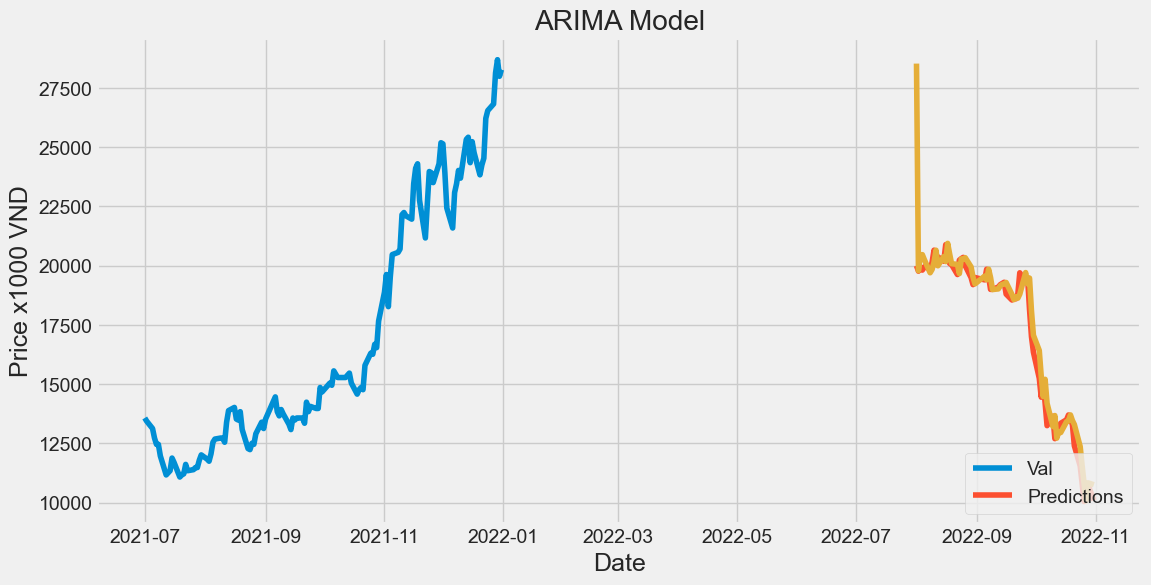

In [190]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(HBC)

time_step = 5

train_data = scaled_data[0:int(len(HBC)), :]
x_train = []
y_train = []

for i in range(time_step, len(train_data)):
    x_train.append(train_data[i-time_step:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

X = HBC.values
train = X[:len(HBC)]
test = HBCtest.values

start = datetime.now()
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
end = datetime.now()

print("Run time for ARIMA model: ", end - start)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE - ARIMA: %.3f' % rmse)

HBC_valid = HBCtest
HBC_valid['Predictions'] = predictions

plt.figure(figsize=(12,6))
plt.title('ARIMA Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price x1000 VND', fontsize=18)
plt.plot(HBC['Price'])
plt.plot(HBC_valid[['Price', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

### NHH

Run time for ARIMA model:  0:00:04.336569
Test RMSE - ARIMA: 2144.200


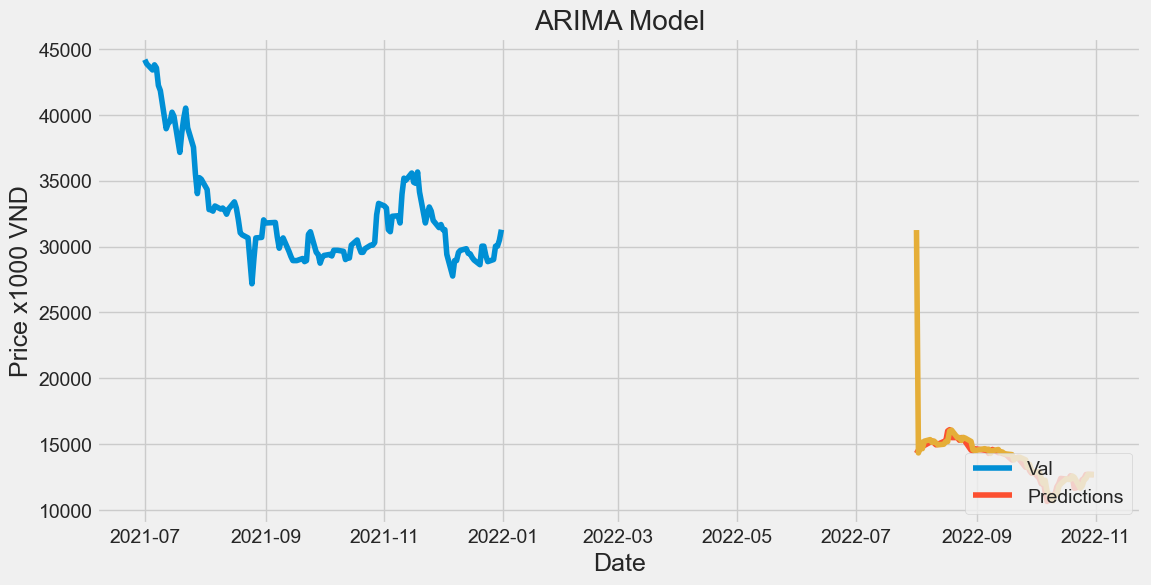

In [191]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(NHH)

time_step = 5

train_data = scaled_data[0:int(len(NHH)), :]
x_train = []
y_train = []

for i in range(time_step, len(train_data)):
    x_train.append(train_data[i-time_step:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

X = NHH.values
train = X[:len(NHH)]
test = NHHtest.values

start = datetime.now()
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
end = datetime.now()

print("Run time for ARIMA model: ", end - start)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE - ARIMA: %.3f' % rmse)

NHH_valid = NHHtest
NHH_valid['Predictions'] = predictions

plt.figure(figsize=(12,6))
plt.title('ARIMA Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price x1000 VND', fontsize=18)
plt.plot(NHH['Price'])
plt.plot(NHH_valid[['Price', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

### OCB

Run time for ARIMA model:  0:00:04.287986
Test RMSE - ARIMA: 1211.282


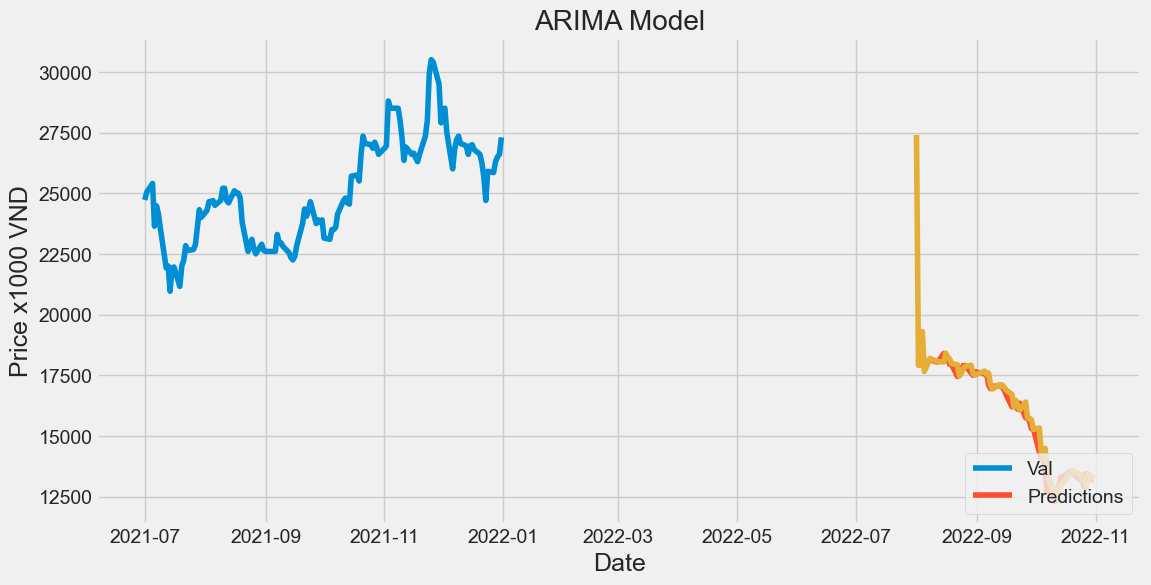

In [192]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(OCB)

time_step = 5

train_data = scaled_data[0:int(len(OCB)), :]
x_train = []
y_train = []

for i in range(time_step, len(train_data)):
    x_train.append(train_data[i-time_step:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

X = OCB.values
train = X[:len(OCB)]
test = OCBtest.values

start = datetime.now()
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
end = datetime.now()

print("Run time for ARIMA model: ", end - start)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE - ARIMA: %.3f' % rmse)

OCB_valid = OCBtest
OCB_valid['Predictions'] = predictions

plt.figure(figsize=(12,6))
plt.title('ARIMA Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price x1000 VND', fontsize=18)
plt.plot(OCB['Price'])
plt.plot(OCB_valid[['Price', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

### TCM

Run time for ARIMA model:  0:00:05.508622
Test RMSE - ARIMA: 1782.317


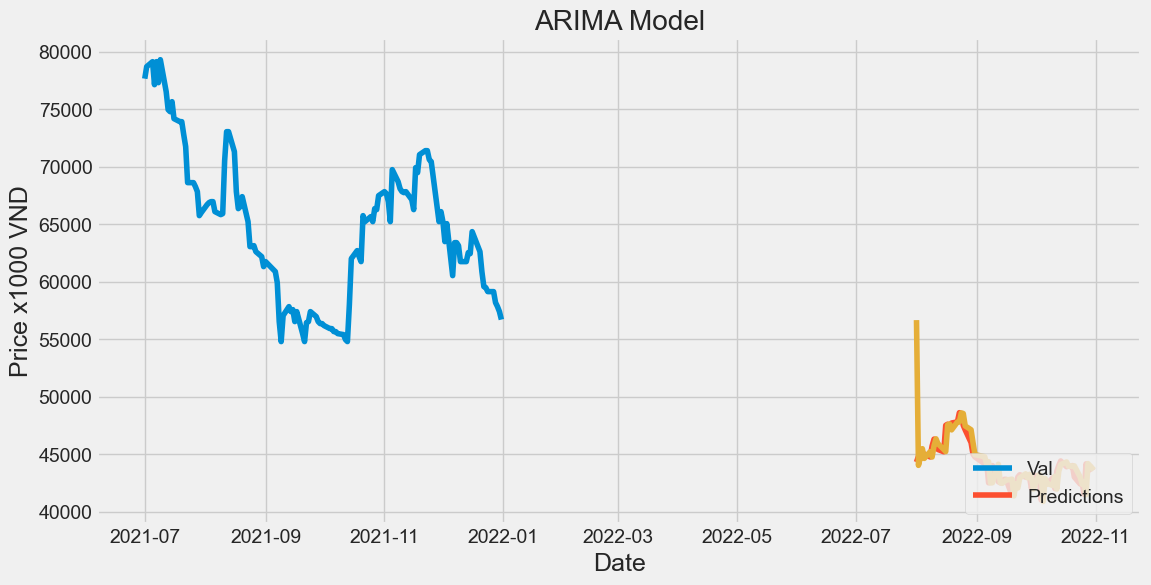

In [193]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(TCM)

time_step = 5

train_data = scaled_data[0:int(len(TCM)), :]
x_train = []
y_train = []

for i in range(time_step, len(train_data)):
    x_train.append(train_data[i-time_step:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

X = TCM.values
train = X[:len(TCM)]
test = TCMtest.values

start = datetime.now()
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
end = datetime.now()

print("Run time for ARIMA model: ", end - start)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE - ARIMA: %.3f' % rmse)

TCM_valid = TCMtest
TCM_valid['Predictions'] = predictions

plt.figure(figsize=(12,6))
plt.title('ARIMA Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price x1000 VND', fontsize=18)
plt.plot(TCM['Price'])
plt.plot(TCM_valid[['Price', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

### TCO

Run time for ARIMA model:  0:00:03.684433
Test RMSE - ARIMA: 1611.115


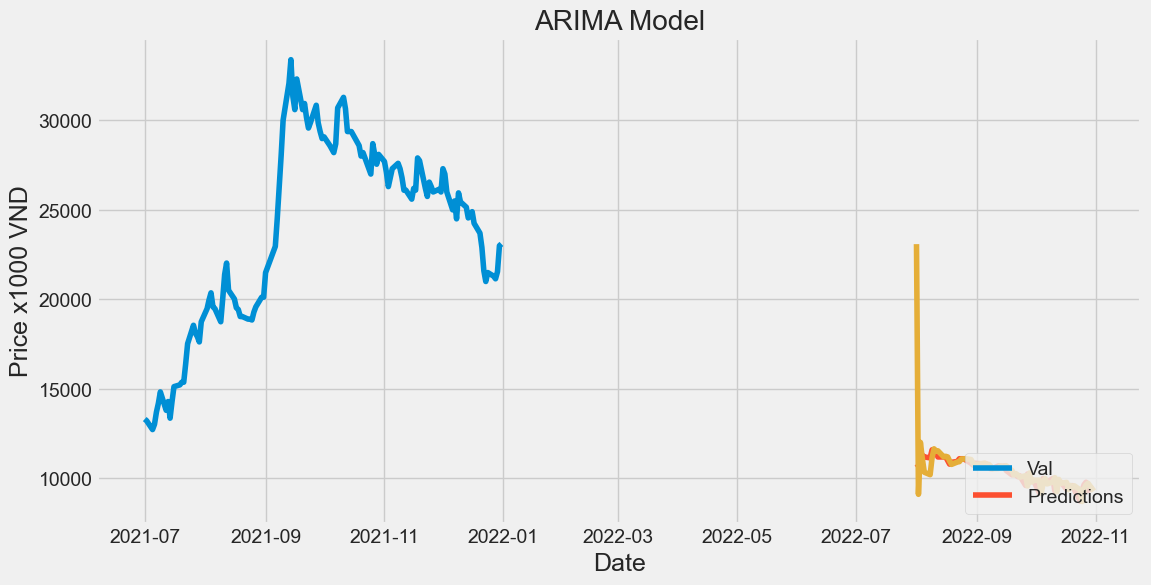

In [194]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(TCO)

time_step = 5

train_data = scaled_data[0:int(len(TCO)), :]
x_train = []
y_train = []

for i in range(time_step, len(train_data)):
    x_train.append(train_data[i-time_step:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

X = TCO.values
train = X[:len(TCO)]
test = TCOtest.values

start = datetime.now()
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
end = datetime.now()

print("Run time for ARIMA model: ", end - start)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE - ARIMA: %.3f' % rmse)

TCO_valid = TCOtest
TCO_valid['Predictions'] = predictions

plt.figure(figsize=(12,6))
plt.title('ARIMA Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price x1000 VND', fontsize=18)
plt.plot(TCO['Price'])
plt.plot(TCO_valid[['Price', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

### VRC

Run time for ARIMA model:  0:00:04.085505
Test RMSE - ARIMA: 2460.885


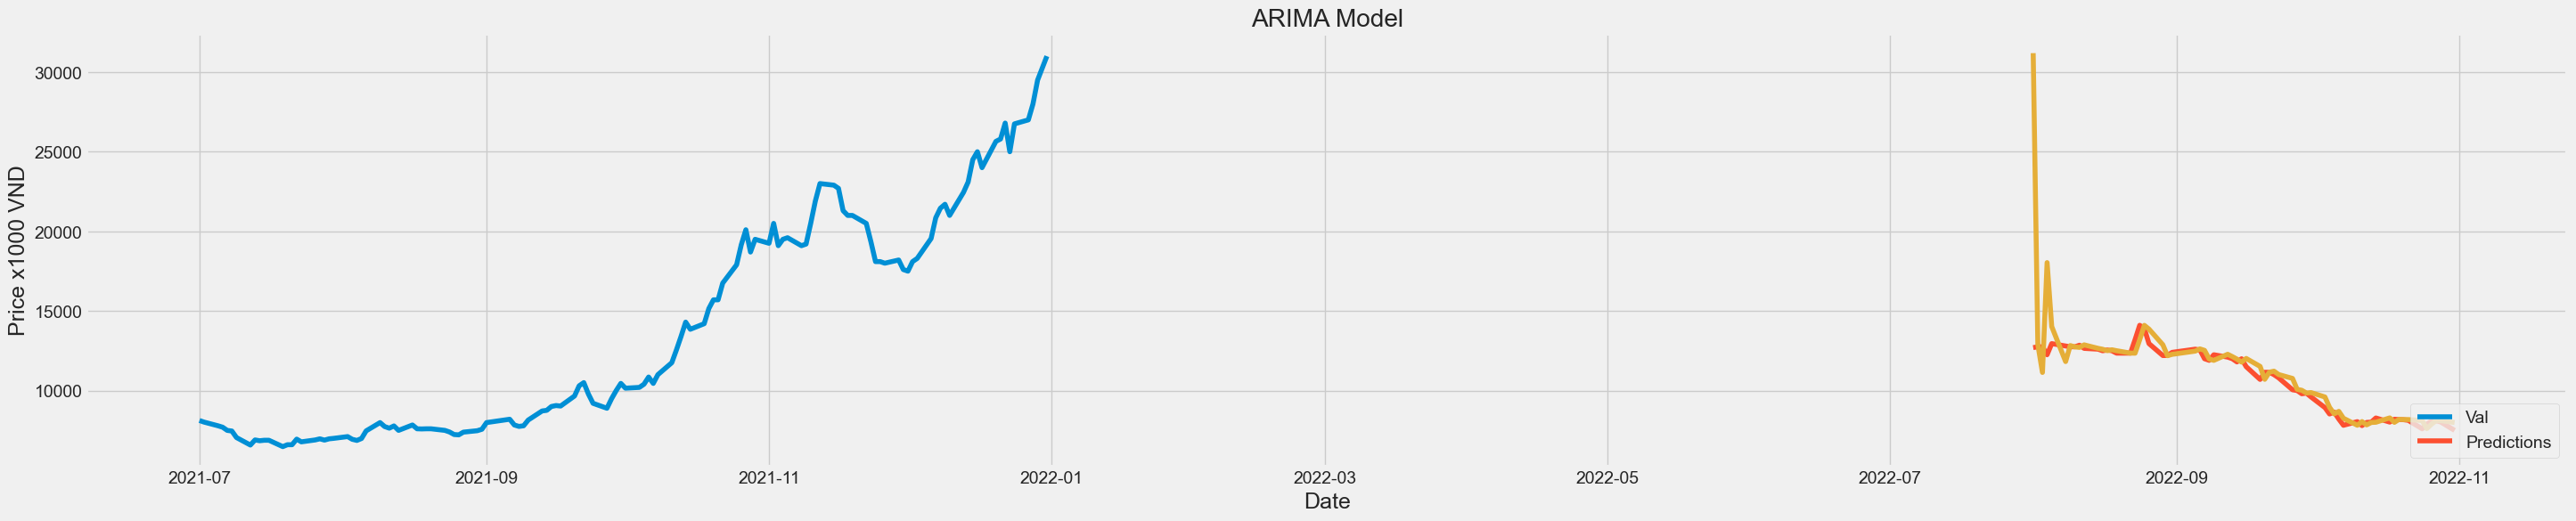

In [195]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(VRC)

time_step = 5

train_data = scaled_data[0:int(len(VRC)), :]
x_train = []
y_train = []

for i in range(time_step, len(train_data)):
    x_train.append(train_data[i-time_step:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

X = VRC.values
train = X[:len(VRC)]
test = VRCtest.values

start = datetime.now()
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
end = datetime.now()

print("Run time for ARIMA model: ", end - start)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE - ARIMA: %.3f' % rmse)

VRC_valid = VRCtest
VRC_valid['Predictions'] = predictions

plt.figure(figsize=(32,6))
plt.title('ARIMA Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price x1000 VND', fontsize=18)
plt.plot(VRC['Price'])
plt.plot(VRC_valid[['Price', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()